In [36]:
import io, os, sys, types
from IPython import get_ipython
from nbformat import current
from IPython.core.interactiveshell import InteractiveShell


def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path

    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path


class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path

    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)

        print ("importing Jupyter notebook from %s" % path)

        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = current.read(f, 'json')


        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod

        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__

        try:
            for cell in nb.worksheets[0].cells:
                if cell.cell_type == 'code' and cell.language == 'python':
                    # transform the input to executable Python
                    code = self.shell.input_transformer_manager.transform_cell(cell.input)
                    # run the code in themodule
                    exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod


class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}

    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return

        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)

        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

sys.meta_path.append(NotebookFinder())


In [37]:
import os
import sys
sys.path.insert(0, os.path.abspath('../scratch'))

## histogram of number of friends

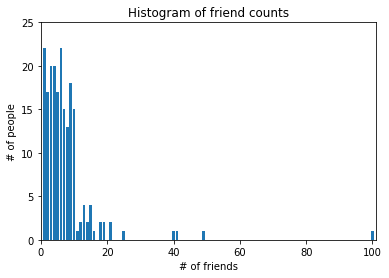

In [38]:
from collections import Counter
import matplotlib.pyplot as plt
import random 

num_friends = num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of friend counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [39]:
num_points = len(num_friends)

largest_value = max(num_friends)
smallest_value = min(num_friends)

sorted_values = sorted(num_friends)
smallest_value_with_list = sorted_values[0]

second_smallest_value = sorted_values[1]
second_larget_value = sorted_values[-2]

num_points, largest_value, smallest_value, smallest_value_with_list, second_smallest_value, second_larget_value

(204, 100.0, 1, 1, 1, 49)

In [40]:
from typing import List
def mean(xs: List[float]) -> float:
    return sum(xs) /len(xs)

mean(num_friends)

7.333333333333333

In [41]:
def _median_odd(xs: List[float]) -> float:
    """median is the middle element of the list with odd elements"""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """median is the average of two middle elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2
    return (sorted_xs[hi_midpoint-1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    "finds the middle most value"
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)


assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [42]:
def quantile(xs: List[float], p: float) -> float:
    """returns the p-th percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

## Mode

In [43]:
def mode(x: List[float] ) -> List[float]:
    """Returns a list , of modes"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

assert set(mode(num_friends)) == {1,6}


## dispersion

In [44]:
def data_range(xs: List[float]) -> List[float]:
    return max(xs) - min(xs)

assert data_range(num_friends) == 99


In [45]:
from work.datascience_with_python.chapter_4.linear_algebra import sum_of_squares

def de_mean(xs:List[float]) -> List[float]:
    """Translate xs by subtracting its mean"""
    x_bar = mean(xs)
    return [x-x_bar for x in xs]

def variance(xs: List[float])-> List[float]:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2 , "variance requires at least 2 elements"
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / n - 1


assert  80.11 < variance(num_friends) < 80.15   

In [46]:
import math

def standard_deviation(xs: List[float])-> float:
    """stanadard deviation is square root of the variance"""
    return math.sqrt(variance(xs))

assert 8.94 < standard_deviation(num_friends) < 8.96   

In [47]:
def interquartile_range(xs: List[float]) -> float:
    """returns the difference between 75%ile and 25%ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

assert interquartile_range(num_friends) == 6 

In [49]:
from work.datascience_with_python.chapter_4.linear_algebra import dot

daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

daily_hours = [dm / 60 for dm in daily_minutes]

# can be used for checking the senator's vote on bills by pitting them against. 
#A large covariance means both are on the same side and a small one means they're opposite.
# zero co-variance means no relationship
def co_variance(xs: List[float], ys:List[float]) -> float:
    assert (len(xs) == len(ys)), "xs and ys must have the same length"
    return list_dot(de_mean(xs), de_mean(ys))/(len(xs) - 1)

assert 22.42 < co_variance(num_friends, daily_minutes) < 22.43
assert 22.42/60 < co_variance(num_friends, daily_hours) < 22.43/60

In [57]:
def correlation(xs:List[float], ys:List[float]) -> float:
    "Measures how much xs and ys vary in tandem about their means"
    stddev_x = standard_deviation(xs)
    stddev_y = standard_deviation(ys)

    if stddev_x > 0 and stddev_y > 0:
        return co_variance(xs, ys)/stddev_x / stddev_y
    else:
        return 0 # if no variation correlation is zero
assert 0.24 < correlation(num_friends, daily_minutes) < 0.252